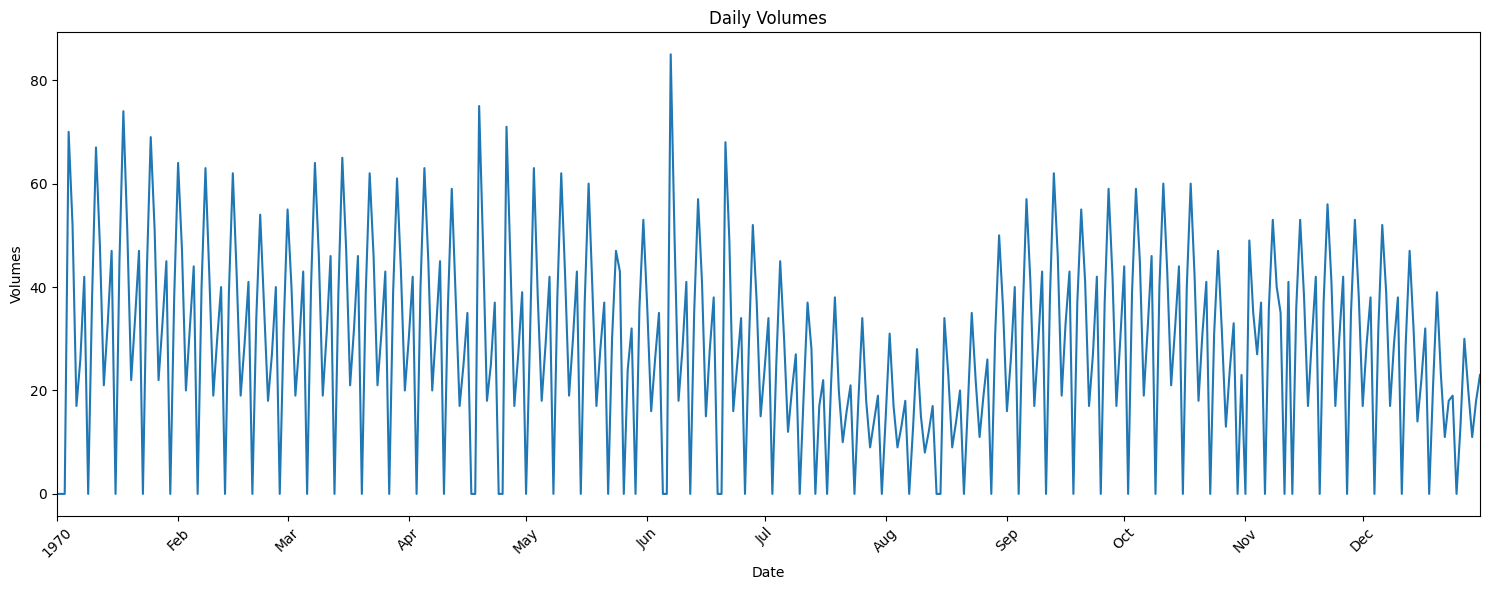

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

day_dataframe = pd.read_excel('./Cas_pratique_-_Volumes_par_jour.xlsx', sheet_name='Commandes', \
                              parse_dates={'day': ['Jour']}, date_format='%m/%d/%Y')
date_format = "%Y-%m-%d %H:%M:%S"

plt.figure(figsize=(15, 6))

plt.plot(day_dataframe['day'], day_dataframe['Nombre de commandes'])

plt.xlabel('Date')
plt.ylabel('Volumes')
plt.title('Daily Volumes')

# Specify the desired date range for the x-axis
start_date = day_dataframe['day'].min()
end_date = day_dataframe['day'].max()
plt.xlim(start_date, end_date)



# Set the locator and formatter for the x-axis dates
date_locator = mdates.AutoDateLocator()
date_formatter = mdates.ConciseDateFormatter(date_locator)

# Apply the locator and formatter to the x-axis
plt.gca().xaxis.set_major_locator(date_locator)
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()




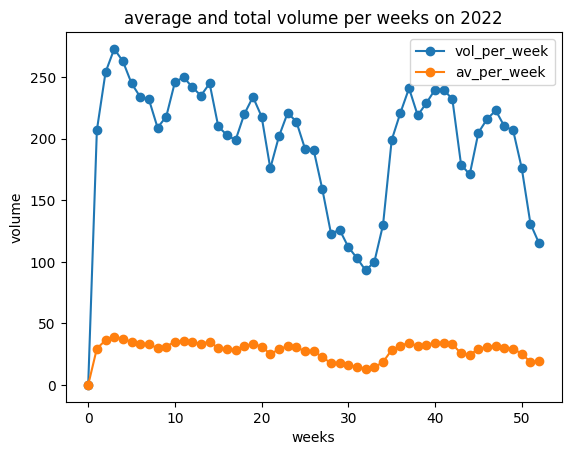

In [40]:
import pandas as pd
import glob

# Get a list of SXX files paths
excel_files = glob.glob('./S*.xlsx')

# Create an empty list to store DataFrames
dataframesWeeksum = []

# Read each Excel file into a DataFrame and append to the list
i = 0
while i < 53:
    if i < 10:
        file = f'S0{i}.xlsx'
    else:
        file = f'S{i}.xlsx'
    df = pd.read_excel(file, sheet_name='week_sum')
    dataframesWeeksum.append(df)
    i += 1
    
# Concatenate the DataFrames into a single DataFrame
combined_df = pd.concat(dataframesWeeksum)

# Reset the index of the combined DataFrame
combined_df = combined_df.reset_index(drop=True)

plt.plot(combined_df.index.values, combined_df['total_volume'], marker='o', label='vol_per_week')
plt.plot(combined_df.index.values, combined_df['average_per_day'], marker='o', label='av_per_week')

plt.xlabel('weeks')
plt.ylabel('volume')

plt.title('average and total volume per weeks on 2022')

plt.legend()

plt.show()


In [46]:
# Une petite intuition concernant les vacances scolaires...

import datetime

# ---------- vacance de la toussain
# Date de la dernière semaine d'octobre 2022
last_week_october = datetime.datetime(2022, 10, 31)
# Calcul du numéro de semaine
week_number_last_october = last_week_october.isocalendar()[1]

# ---------- vacance de la toussain
# Date de la dernière semaine d'octobre 2022
last_week_feb = datetime.datetime(2022, 2, 25)
# Calcul du numéro de semaine
week_number_feb_last_week = last_week_feb.isocalendar()[1]

# ---------- vacance de la printemps
# Date de la dernière semaine d'avril 2022
last_week_apr = datetime.datetime(2022, 4, 23)
# Calcul du numéro de semaine
week_number_apr_last_week = last_week_apr.isocalendar()[1]

# Affichage des numéros de semaine
print("Vacances toussaint: Numéro de la dernière semaine d'octobre 2022 :", week_number_last_october)
print("Vacance hiver: Numéro de la derniere semaine fevrier 2022 :", week_number_feb_last_week)
print("Vacance printemps: Numéro de la derniere semaine avril 2022 :", week_number_apr_last_week)



Vacances toussaint: Numéro de la dernière semaine d'octobre 2022 : 44
Vacance hiver: Numéro de la derniere semaine fevrier 2022 : 8
Vacance printemps: Numéro de la derniere semaine avril 2022 : 16


           day_sum     day_av
Monday        1494  28.730769
Tuesday       2819  54.211538
Wednesday     2001  38.480769
Thursday       863  16.596154
Friday        1340  25.769231
Saturday      1916  36.846154
Sunday           0   0.000000


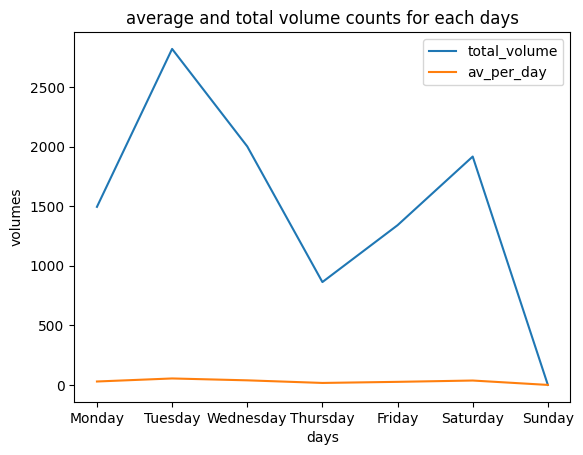

In [30]:
import pandas as pd
import glob

# Get a list of SXX files paths
excel_files = glob.glob('./S*.xlsx')

# Create an empty list to store DataFrames
dataframeDaySum = pd.DataFrame({'day_sum': [0, 0, 0, 0, 0, 0, 0], \
                                'day_av': [0, 0, 0, 0, 0, 0, 0]}, \
                               index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


# Read each Excel file into a DataFrame and append to the list
for file in excel_files:
    df2 = pd.read_excel(file, sheet_name='volume_per_days')
    for index, row in df2.iterrows():
        dataframeDaySum.loc[row['day'], 'day_sum'] += row['volume']
        dataframeDaySum.loc[row['day'], 'day_av'] = dataframeDaySum.loc[row['day'], 'day_sum'] / 52

print(dataframeDaySum)
        
plt.plot(dataframeDaySum.index, dataframeDaySum['day_sum'], label='total_volume')
plt.plot(dataframeDaySum.index, dataframeDaySum['day_av'], label='av_per_day')

plt.xlabel('days')
plt.ylabel('volumes')

plt.title('average and total volume counts for each days')

plt.legend()

plt.show()


# Analysis

for the analysis, i decided to go with tree views on the dataset, lets get into it one-by-one

    The first graph allows us to glimpse the average volume and standard deviation of sales per day over the months 
    of 2022.
    It is clear that the sales volume typically ranges between 20 and 40 units per day, with a significant lull 
    during the summer months, specifically July and August, where the cruising range is established more within the 
    interval [10, 30].
    We can also observe a repetition of the number of sales per day throughout the week, thanks to the regular peaks 
    that emerge outside the warm zone. However, it is difficult to be more precise at the moment. 
    
    The weekly sales analysis reveals intriguing patterns. We observe a distinct trend where every 6-7 weeks, the 
    number of sales experiences a significant decline, only to quickly recover and resume its position for another 6 
    to 7 weeks.
    the little script under the week analysis put on the spot light the pattern:
        * Winter holidays: Last week number of February 2022: 8
        * Spring holidays: Last week number of April 2022: 16
        * Toussaint holidays: Last week number of October 2022: 44
        * Noel holidays: 51 -52
    It is pretty clear that the sale volume is direclty bind with the holidays
    
    finally we have a little count of volume sales for each days.
    the max sale is tuesday and the lowest is sunday with a 0 total count
    
    From my perspective, all of this information converges around a common factor: the availability of parents to 
    take care of their children. 
    Quitoc addresses the following need: providing good quality products, family meals, and the opportunity to share 
    a good time, while reducing the challenges of family meal logistics. It seems logical to me that parents, as 
    household managers, would rely more on Quitoc during periods when the family schedule is under the most 
    pressure.
    